# Project: TMDB-MOVIES
## Prepared By: Faris AlShammari


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Questions is:

#### 1- What is the Average Rate and revenue
#### 2- Highest Rating Movie.
#### 3- Lowest Rating Movie.
#### 4- Highest Revenue Movie.
#### 5- Lowest Revenue Movie.
#### 6- how many movies above and below the average rating
#### 7- Who is the better director (Tarantino, Nolan or Scorsese) ?
#### 8- Comparing Ratings, Revenues and Popularity. by some geners


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df_Movies = pd.read_csv('tmdb-movies.csv')
df_Movies.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [3]:
df_Movies.tail(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df_Movies.shape

(10866, 21)

In [5]:
df_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df_Movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning (Replace this with more specific notes!)

### Drop some useless columns:

In [7]:
df_Movies.drop(['imdb_id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)

In [8]:
df_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
 15  budget_adj         

### Count duplicates.

In [9]:
sum(df_Movies.duplicated())

1

### delete the duplicates and make sure the duplicated are deleted


In [10]:
df_Movies.drop_duplicates(inplace=True)

In [11]:
sum(df_Movies.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

### 1- What is the Average Rate and Revenue

#### 1.1: The Average Rate

Average Rate = 5.98


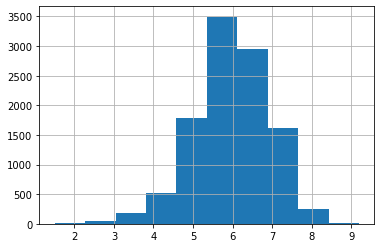

In [12]:
avgRate = round ( df_Movies['vote_average'].mean(), 2)
print("Average Rate = "+str(avgRate))

df_Movies['vote_average'].hist()

#### 1.2: The Average Revenue

Average Revenue = 51369001.8


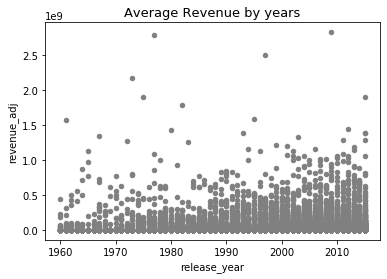

In [13]:
avgRevenue = round ( df_Movies['revenue_adj'].mean(), 1)
print("Average Revenue = "+str(avgRevenue))

df_Movies.plot(x ='release_year', y='revenue_adj',kind='scatter',color = 'grey', fontsize = 10);
plt.title('Average Revenue by years', fontsize = 13);

### 2- Highest Rating Movie:

In [59]:
max_vote = df_Movies['vote_average'].idxmax()
highName = df_Movies.loc[max_vote, 'original_title']
highRate = max(df_Movies['vote_average'])

print("Highest Movie Rate:")
print("\tName: ("+highName+")\n\tRate: ("+str(highRate)+")" )

Highest Movie Rate:
	Name: (The Story of Film: An Odyssey)
	Rate: (9.2)


In [61]:
df_Movies.loc[max_vote]

id                                                                 125336
popularity                                                       0.006925
budget                                                                  0
revenue                                                                 0
original_title                              The Story of Film: An Odyssey
cast                    Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director                                                     Mark Cousins
keywords                cinema|nouvelle vague|hindi cinema|cinema novo...
runtime                                                               900
genres                                                        Documentary
production_companies                                                  NaN
release_date                                                       9/3/11
vote_count                                                             14
vote_average                          

### 3- Lowest Rating Movie:

In [57]:
min_vote = df_Movies['vote_average'].idxmin()
lowName = df_Movies.loc[min_vote, 'original_title']
lowRate = min(df_Movies['vote_average'])

print("Lowest Movie Rate:")
print("\tName: ("+lowName+")\n\tRate: ("+str(lowRate)+")" )

Lowest Movie Rate:
	Name: (Transmorphers)
	Rate: (1.5)


In [58]:
df_Movies.loc[min_vote]

id                                                                  25055
popularity                                                        0.12112
budget                                                                  0
revenue                                                                 0
original_title                                              Transmorphers
cast                    Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director                                                      Leigh Scott
keywords                                                       futuristic
runtime                                                                86
genres                                   Action|Adventure|Science Fiction
production_companies                                          Asylum, The
release_date                                                      6/26/07
vote_count                                                             10
vote_average                          

### 4- Highest revenue:

In [16]:
max_revenue = df_Movies['revenue_adj'].idxmax()
highRevenueName = df_Movies.loc[max_revenue, 'original_title']
maxRevenue = max(df_Movies['revenue_adj'])
print("Highest Movie Revenue:")
print("\tName: ("+highRevenueName+")\n\tRevenue: ("+str(maxRevenue)+" $)" )

Highest Movie Revenue:
	Name: (Avatar)
	Revenue: (2827123750.41189 $)


In [63]:
df_Movies.loc[max_revenue]

id                                                                  19995
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
keywords                culture clash|future|space war|space colony|so...
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                                     12/10/09
vote_count                                                           8458
vote_average                          

### 5- Lowest revenue

In [17]:
min_revenue = df_Movies['revenue_adj'].idxmin()
lowRevenueName = df_Movies.loc[min_revenue, 'original_title']
minRevenue = min(df_Movies['revenue_adj'])
print("Lowest Movie Revenue:")
print("\tName: ("+lowRevenueName+")\n\tRevenue: ("+str(minRevenue)+" $)" )

Lowest Movie Revenue:
	Name: (Wild Card)
	Revenue: (0.0 $)


In [62]:
df_Movies.loc[min_revenue]

id                                                                 265208
popularity                                                        2.93234
budget                                                           30000000
revenue                                                                 0
original_title                                                  Wild Card
cast                    Jason Statham|Michael Angarano|Milo Ventimigli...
director                                                       Simon West
keywords                                        gambling|bodyguard|remake
runtime                                                                92
genres                                               Thriller|Crime|Drama
production_companies    Current Entertainment|Lionsgate|Sierra / Affin...
release_date                                                      1/14/15
vote_count                                                            481
vote_average                          

### 6- how many movies above and below the average rating


In [66]:
averageRating = df_Movies.vote_average.mean()

movies_above = df_Movies.query('vote_average >= 5.975').id.count()
movies_below = df_Movies.query('vote_average < 5.975').id.count()

print("The movie's Rating comparing to Average Rating: ")
print("Above Average Rating(5.975): "+ str(movies_above) +" Movies\nBelow Average Rating(5.975): "
      +str(movies_below)+" Movies")

The movie's Rating comparing to Average Rating: 
Above Average Rating(5.975): 5810 Movies
Below Average Rating(5.975): 5055 Movies


### 7- Who is the better director (Tarantino, Nolan or Scorsese) ?

#### 7.1: Explore Quentin Tarantino.

In [70]:
Quentin_movies_count = df_Movies.query(' director == "Quentin Tarantino" ').original_title.count()
Quentin_Popularity = round( df_Movies.query(' director == "Quentin Tarantino" ').popularity.sum(), 2)
Quentin_movies_avgRate = round( df_Movies.query(' director == "Quentin Tarantino" ').vote_average.mean(), 2)
Quentin_profit = round( (df_Movies.query(' director == "Quentin Tarantino" ').revenue_adj.sum())-(df_Movies.query(' director == "Quentin Tarantino" ').budget_adj.sum() ), 2)

print("Quentin Tarantino:")
print("\tDirecting ("+str(Quentin_movies_count)+") Movies.")
print("\tThe average rating for his films = ("+ str(Quentin_movies_avgRate)+"/10)")
print("\tHis Popularity = "+str(Quentin_Popularity))
print("\tHis Total Profit = "+ str(Quentin_profit))

Quentin Tarantino:
	Directing (11) Movies.
	The average rating for his films = (7.35/10)
	His Popularity = 46.06
	His Total Profit = 1317420737.68


#### 7.2: Explore Christopher Nolan.

In [71]:
Nolan_movies_count = df_Movies.query(' director == "Christopher Nolan" ').original_title.count()
Nolan_Popularity = round( df_Movies.query(' director == "Christopher Nolan" ').popularity.sum(), 2)
Nolan_movies_avgRate = round( df_Movies.query(' director == "Christopher Nolan" ').vote_average.mean(), 2)
Nolan_profit = round( (df_Movies.query(' director == "Christopher Nolan" ').revenue_adj.sum())-(df_Movies.query(' director == "Christopher Nolan" ').budget_adj.sum() ), 2)

print("Christopher Nolan:")
print("\tDirecting ("+str(Nolan_movies_count)+") Movies.")
print("\tThe average rating for his films = ("+ str(Nolan_movies_avgRate)+"/10)")
print("\tHis Popularity = "+str(Nolan_Popularity))
print("\tHis Total Profit = "+ str(Nolan_profit))

Christopher Nolan:
	Directing (10) Movies.
	The average rating for his films = (7.47/10)
	His Popularity = 61.96
	His Total Profit = 3149568381.05


#### 7.3: Explore Martin Scorsese.

In [72]:
Scorsese_movies_count = df_Movies.query(' director == "Martin Scorsese" ').original_title.count()
Scorsese_Popularity = round( df_Movies.query(' director == "Martin Scorsese" ').popularity.sum(), 2)
Scorsese_movies_avgRate = round( df_Movies.query(' director == "Martin Scorsese" ').vote_average.mean(), 2)
Scorsese_profit = round( (df_Movies.query(' director == "Martin Scorsese" ').revenue_adj.sum())-(df_Movies.query(' director == "Martin Scorsese" ').budget_adj.sum() ), 2)

print("Martin Scorsese:")
print("\tDirecting ("+str(Scorsese_movies_count)+") Movies.")
print("\tThe average rating for his films = ("+ str(Scorsese_movies_avgRate)+"/10)")
print("\tHis Popularity = "+str(Scorsese_Popularity))
print("\tHis Total Profit = "+ str(Scorsese_profit))

Martin Scorsese:
	Directing (29) Movies.
	The average rating for his films = (6.96/10)
	His Popularity = 32.73
	His Total Profit = 1277125947.28


#### 7.4: Comparing between (Quentin, Nolan and Scorsese).

##### 7.4.1: Comparing Average Rating Movies.

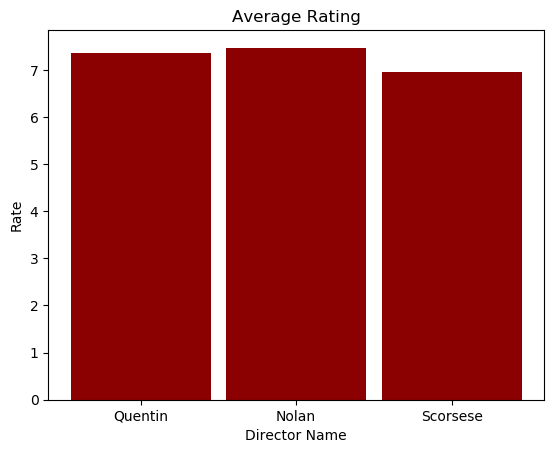

In [73]:
plt.bar([1, 2, 3], 
        [Quentin_movies_avgRate, Nolan_movies_avgRate, Scorsese_movies_avgRate], 
        tick_label=['Quentin', 'Nolan', 'Scorsese'], 
        color='darkred', 
        width=0.9)

plt.title('Average Rating')
plt.xlabel('Director Name')
plt.ylabel('Rate');

##### 7.4.2: Comparing how many Movies they are directed.

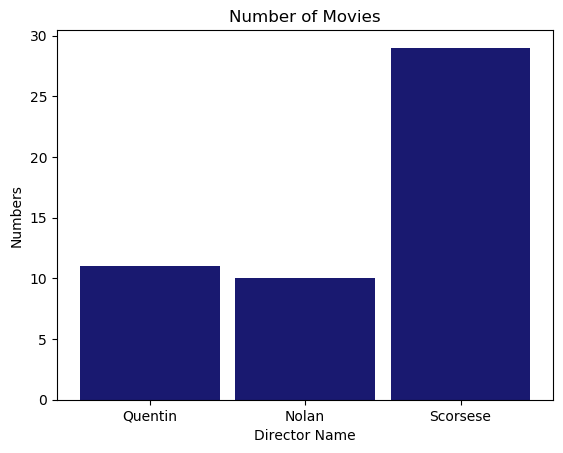

In [74]:
plt.bar([1, 2, 3], 
        [Quentin_movies_count, Nolan_movies_count, Scorsese_movies_count], 
        tick_label=['Quentin', 'Nolan', 'Scorsese'], 
        color='midnightblue', width=0.9)

plt.title('Number of Movies')
plt.xlabel('Director Name')
plt.ylabel('Numbers');

##### 7.4.3: Comparing The popularitiest.

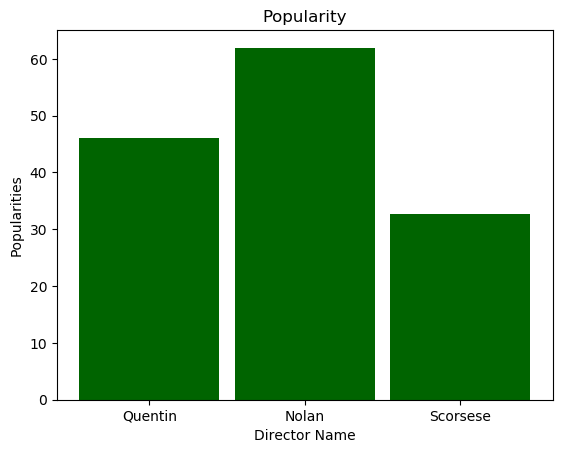

In [75]:
plt.bar([1, 2, 3], 
        [Quentin_Popularity, Nolan_Popularity, Scorsese_Popularity], 
        tick_label=['Quentin', 'Nolan', 'Scorsese'], 
        color='darkgreen', width=0.9)

plt.title('Popularity')
plt.xlabel('Director Name')
plt.ylabel('Popularities');

##### 7.4.4: Comparing who got more profit.

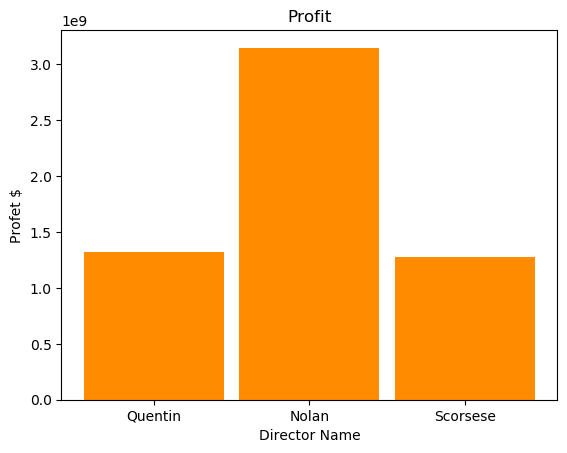

In [76]:
plt.bar([1, 2, 3], 
        [Quentin_profit, Nolan_profit, Scorsese_profit], 
        tick_label=['Quentin', 'Nolan', 'Scorsese'], 
        color='darkorange', width=0.9)

plt.title('Profit')
plt.xlabel('Director Name')
plt.ylabel('Profet $');

### 8- Comparing Ratings, Revenues and Popularity. by some geners


#### 8.1.1: Genre Romance.

In [26]:
RomanceRev = df_Movies.query(' genres == "Romance" ').revenue_adj.sum()
RomanceAvgRate = round( df_Movies.query(' genres == "Romance" ').vote_average.mean(), 2)
RomancePop = round( df_Movies.query(' genres == "Romance" ').popularity.mean(), 3)

print("Genre: Romance")
print("\tTotal Revenue: ("+str(RomanceRev)+")$ \n\tAverage Rate: ("+str(RomanceAvgRate)+"/10)")
print("\tpopularity: ("+str(RomancePop)+")")

Genre: Romance
	Total Revenue: (110656268.8232817)$ 
	Average Rate: (5.92/10)
	popularity: (0.267)


#### 8.1.2: Genre Comedy.

In [27]:
ComedyRev = df_Movies.query(' genres == "Comedy" ').revenue_adj.sum()
ComedyAvgRate = round( df_Movies.query(' genres == "Comedy" ').vote_average.mean(), 2)
ComedyPop = round( df_Movies.query(' genres == "Comedy" ').popularity.mean(), 3)

print("Genre: Comedy")
print("\tTotal Revenue: ("+str(ComedyRev)+")$ \n\tAverage Rate: ("+str(ComedyAvgRate)+"/10)")
print("\tpopularity: ("+str(ComedyPop)+")")

Genre: Comedy
	Total Revenue: (24851953624.492527)$ 
	Average Rate: (5.83/10)
	popularity: (0.527)


#### 8.1.3: Genre Crime.

In [28]:
CrimeRev = df_Movies.query(' genres == "Crime" ').revenue_adj.sum()
CrimeAvgRate = round( df_Movies.query(' genres == "Crime" ').vote_average.mean(), 2)
CrimePop = round( df_Movies.query(' genres == "Crime" ').popularity.mean(), 3)


print("Genre: Crime")
print("\tTotal Revenue: ("+str(CrimeRev)+")$ \n\tAverage Rate: ("+str(CrimeAvgRate)+"/10)")
print("\tpopularity: ("+str(CrimePop)+")")

Genre: Crime
	Total Revenue: (0.0)$ 
	Average Rate: (5.13/10)
	popularity: (0.176)


#### 8.1.4: Genre Action.

In [29]:
ActionRev = df_Movies.query(' genres == "Action" ').revenue_adj.sum()
ActionAvgRate = round( df_Movies.query(' genres == "Action" ').vote_average.mean(), 2)
ActionPop = round( df_Movies.query(' genres == "Action" ').popularity.mean(), 3)

print("Genre: Action")
print("\tTotal Revenue: ("+str(ActionRev)+")$ \n\tAverage Rate: ("+str(ActionAvgRate)+"/10)")
print("\tpopularity: ("+str(ActionPop)+")")

Genre: Action
	Total Revenue: (2446612218.6752334)$ 
	Average Rate: (5.53/10)
	popularity: (0.592)


#### 8.1.5: Genre Adventure.

In [30]:
AdventureRev = df_Movies.query(' genres == "Adventure" ').revenue_adj.sum()
AdventureAvgRate = round( df_Movies.query(' genres == "Adventure" ').vote_average.mean(), 2)
AdventurePop = round( df_Movies.query(' genres == "Adventure" ').popularity.mean(), 3)

print("Genre: Adventure")
print("\tTotal Revenue: ("+str(AdventureRev)+")$ \n\tAverage Rate: ("+str(AdventureAvgRate)+"/10)")
print("\tpopularity: ("+str(AdventurePop)+")")

Genre: Adventure
	Total Revenue: (1220910153.6873975)$ 
	Average Rate: (5.55/10)
	popularity: (0.649)


#### 8.1.6: Genre War.

In [31]:
WarRev = df_Movies.query(' genres == "War" ').revenue_adj.sum()
WarAvgRate = round( df_Movies.query(' genres == "War" ').vote_average.mean(), 2)
WarPop = round( df_Movies.query(' genres == "War" ').popularity.mean(), 3)

print("Genre: War")
print("\tTotal Revenue: ("+str(WarRev)+")$ \n\tAverage Rate: ("+str(WarAvgRate)+"/10)")
print("\tpopularity: ("+str(WarPop)+")")

Genre: War
	Total Revenue: (166615814.0804482)$ 
	Average Rate: (6.48/10)
	popularity: (1.058)


#### 8.1.7: Genre Drama.

In [32]:
DramaRev = df_Movies.query(' genres == "Drama" ').revenue_adj.sum()
DramaAvgRate = round( df_Movies.query(' genres == "Drama" ').vote_average.mean(), 2)
DramaPop = round( df_Movies.query(' genres == "Drama" ').popularity.mean(), 3)

print("Genre: Drama")
print("\tTotal Revenue: ("+str(DramaRev)+")$ \n\tAverage Rate: ("+str(DramaAvgRate)+"/10)")
print("\tpopularity: ("+str(DramaPop)+")")

Genre: Drama
	Total Revenue: (20902569439.736996)$ 
	Average Rate: (6.32/10)
	popularity: (0.507)


#### 8.1.8: Genre Horror.

In [33]:
HorrorRev = df_Movies.query(' genres == "Horror" ').revenue_adj.sum()
HorrorAvgRate = round( df_Movies.query(' genres == "Horror" ').vote_average.mean(), 2)
HorrorPop = round( df_Movies.query(' genres == "Horror" ').popularity.mean(), 3)

print("Genre: Horror")
print("\tTotal Revenue: ("+str(HorrorRev)+")$ \n\tAverage Rate: ("+str(HorrorAvgRate)+"/10)")
print("\tpopularity: ("+str(HorrorPop)+")")

Genre: Horror
	Total Revenue: (3797026291.956844)$ 
	Average Rate: (5.13/10)
	popularity: (0.37)


### 8.2- Comparing between genres

#### 8.2.1: The Average Rate.

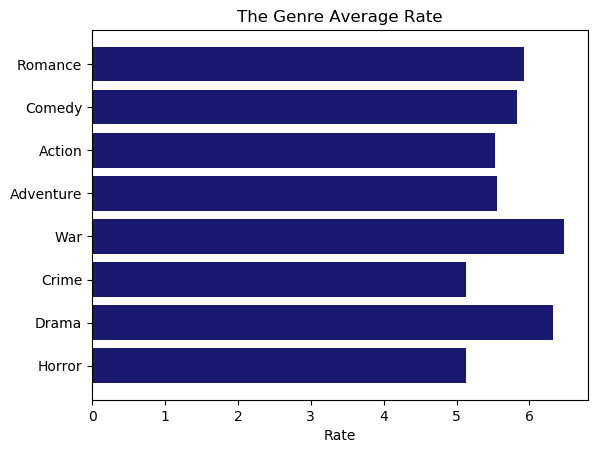

In [34]:
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()


genres_1 = ('Romance', 'Comedy', 'Action', 'Adventure', 'War', 'Crime', 'Drama', 'Horror')
y_pos = np.arange(len(genres_1))
Genre_Rate = (RomanceAvgRate, ComedyAvgRate, ActionAvgRate, AdventureAvgRate, WarAvgRate, CrimeAvgRate, DramaAvgRate, HorrorAvgRate)

error = np.random.rand(len(genres_1))

ax.barh(y_pos, Genre_Rate, align='center', color='midnightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres_1)
ax.invert_yaxis()
ax.set_xlabel('Rate')
ax.set_title('The Genre Average Rate')

plt.show()

#### 8.2.2: Average Revenue.

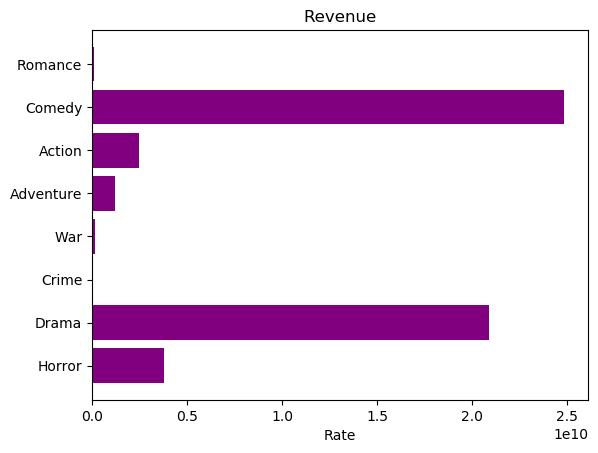

In [35]:
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()


genres_1 = ('Romance', 'Comedy', 'Action', 'Adventure', 'War', 'Crime', 'Drama', 'Horror')
y_pos = np.arange(len(genres_1))
Genre_Rate = (RomanceRev, ComedyRev, ActionRev, AdventureRev, WarRev, CrimeRev, DramaRev, HorrorRev)

error = np.random.rand(len(genres_1))

ax.barh(y_pos, Genre_Rate, align='center', color='purple')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres_1)
ax.invert_yaxis()
ax.set_xlabel('Rate')
ax.set_title('Revenue')

plt.show()

#### 8.2.3: Most Popularity.

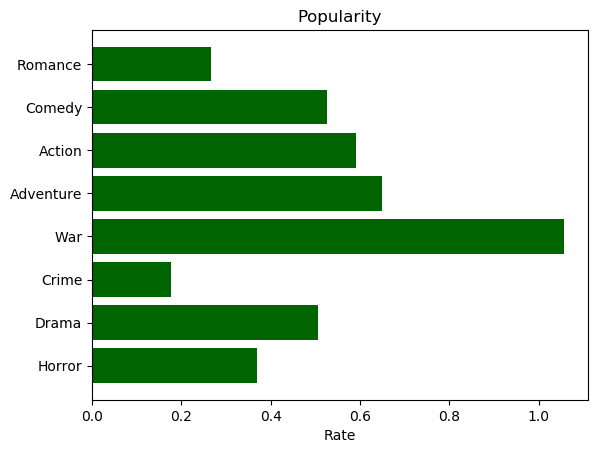

In [36]:
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()


genres_1 = ('Romance', 'Comedy', 'Action', 'Adventure', 'War', 'Crime', 'Drama', 'Horror')
y_pos = np.arange(len(genres_1))
Genre_Rate = (RomancePop, ComedyPop, ActionPop, AdventurePop, WarPop, CrimePop, DramaPop, HorrorPop)

error = np.random.rand(len(genres_1))

ax.barh(y_pos, Genre_Rate, align='center', color='darkgreen')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres_1)
ax.invert_yaxis()
ax.set_xlabel('Rate')
ax.set_title('Popularity')

plt.show()

<a id='conclusions'></a>
## Conclusions

### Observation:
1- I noticed that the total average Rating is arround 6/10, so there is a lot of movies get low rate and that caused low average rate. and the average revenue is 51 million dollar it is a huge number.

2- The highest rate movie is (The Story of Film: An Odyssey) which release in 2011 and its genre is Documentary and got (9.2/10).

3- The lowest rate movie is (Transmorphers) which release in 2007 and its genre is (Action/Adventure/Science Fiction) and got (1.5/10).

4- The Highest revenue movie is (Avatar) with 2.8 billion Dollar. which release in 2009 and its genre is (Action/Adventure/Fantasy/Science Fiction) and got rate (7.1/10).

5- The lowest revenue movie is (Wild Card) with  Zerro Dollar. which release in 2015 and its genre is (Thriller/Crime/Drama) and got rate (5.3/10).

6- The total average rating is (5.975/10) and there is 5810 movies which they are rating over the average rating and 5055 movies are below.

7- The director (Christopher Nolan) has the highest average rate (7.47/10) and most profit (3.1 Billion Dollar) of his movies and he is the popularitiest comparing with the directors Quentin Tarantino who has average rate (7.35/10), profit (1.3 Billion Dollar) and Martin scorsese who has average rate (6.96/10), profit (1.2 Billion Dollar). But Martin Scorsese directed movies more than Nolan and Tarantino, he directed almost 29 movies, Nolan 10 and Tarantino 11, so because Scorsese directed many movies that affected his Average Rate and profit.

8- By genres i found the highest average rate, revenue and popularity, The highest three genres of Average rate is 
( War(6.48/10), Drama(6.32/10) and Romance(5.92/10) ), highest revenue is (Comedy(24.8B), Drama(20.9B) and Horror(3.7B)) but there are mistakes in this dataset so some revenue equals zero. and the popularitiest by genre is (War(1.05), Adventure(0.65) and Action(0.592)). in the end i noticed that the genre (War) is the best for people to enjoy watching and for the productions company because it can make good revenue and profit.


### Limitation:
1- The dataset is untill 2015 so there are 5 years not included there and it affects for who wants to deep analize.

2- I dropped some of columns (imdb_id, homepage, tagline and overview), because i do not need it in my analizing.

3- Some Zero's values so it can be full accuracy.